### Establishing a surface plot function. 

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


def surface_plot(x,y,z,z_min = 0,z_max = 1.1 ,
                 title  = 'title', z_label = 'z_label' ,filename = 'filename' ,save = None):

    xplt , yplt = np.meshgrid(x,y)
    zplt = np.reshape(z, xplt.shape, order = 'C')

    fig1 = plt.figure()
    ax = fig1.gca(projection='3d')
    surf = ax.plot_surface(xplt, yplt, zplt, cmap=cm.coolwarm, linewidth=10, antialiased=True)
    ax.set_zlim(z_min,z_max)
    ax.zaxis.set_major_locator(LinearLocator(5))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.01e'))
    fig1.colorbar(surf, shrink=0.5, aspect=15)
    ax.set_zlabel(z_label)
    plt.title(title)
    plt.ylabel('y')
    plt.xlabel('x')

    if save == True:
        plt.savefig(filename)
    elif save == 'show':
         plt.show()

### Initial Matrix 50x50

(51, 51)


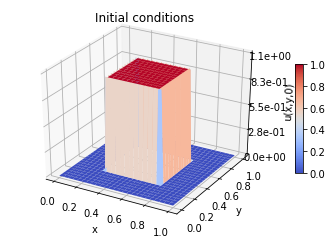

In [122]:
initial = np.loadtxt('initial_matrix.dat') 
print(initial.shape)
x = np.linspace(0,1,51)
surface_plot(x,x,initial,z_min = 0,z_max = 1.1 ,
                 title  = 'Initial conditions' ,
                 z_label = 'u(x,y,0)',
                 filename = 'Initial_50x50' ,
                 save = True)

# N = 250 steps. 
## The analytical solution

dx =  0.02
dt =  8e-05
t = 0.02


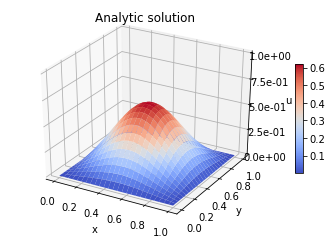

In [123]:
A_250 = np.loadtxt('2d-analytical_tsteps250_dt0,2_500_50x50_new.dat')
x = np.linspace(0,1,51)
surface_plot(x,x,A_250,z_min = 0,z_max = 1 ,
                 title  = 'Analytic solution' ,
                 z_label = 'u',
                 filename = 'analytical_250' ,
                 save = True)

dx = x[1]-x[0]
print('dx = ', dx)

dt = 0.2*dx**2
print('dt = ', dt)

t = dt*250

print('t =', t )

## The numerical solution


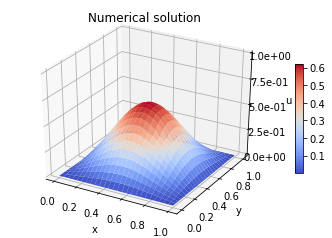

In [124]:
N_250 = np.loadtxt('2d-numerical_tsteps250_dt0,2_50x50_new.dat')

x = np.linspace(0,1,51)
surface_plot(x,x,N_250,z_min = 0,z_max = 1 ,
                 title  = 'Numerical solution',
                 z_label = 'u',
                 filename = 'numerical_250',
                 save = True)

## The Error analysis
### Absolute difference

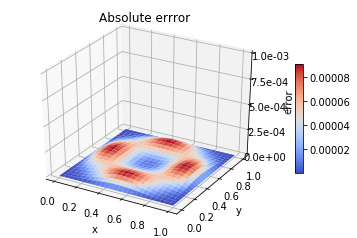

In [125]:
E_250 = np.abs(N_250-A_250)

surface_plot(x,x,E_250,z_min = 0,z_max = 0.001,
                 title  = 'Absolute errror', 
                 z_label = 'error',
                 filename = 'abs_error_250' ,
                 save = True)

### Relativ error:
    

/Users/phb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


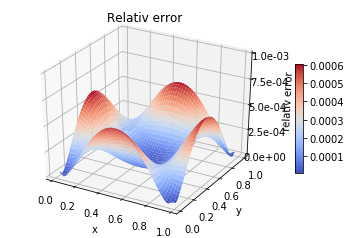

In [126]:
rE_250 = E_250/A_250

surface_plot(x[1:-1],x[1:-1],rE_250[1:-1,1:-1],z_min = 0,z_max = 0.001 ,
                 title  = 'Relativ error',
                 z_label = 'relativ error'
                 ,filename = 'rel_error_250' ,
                 save = True)

In [127]:
print('Max error:' ,  np.max(E_250))
print('Max relativ error; ', np.max(rE_250[1:-1,1:-1]))

Max error: 9.208371817559513e-05
Max relativ error;  0.0006092993500760532


## N = 2500

In [128]:
# time:
dt = 0.2*dx**2
print('dt = ', dt)

t = dt*2500

print('t =', t )

dt =  8e-05
t = 0.2


### Analytical solution:
    

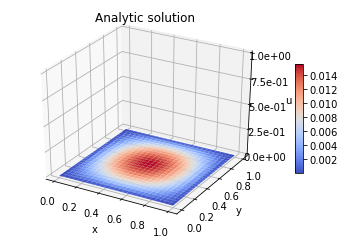

In [129]:
A_2500 = np.loadtxt('2d-analytical_tsteps2500_dt0,2_500_50x50.dat')
x = np.linspace(0,1,51)

surface_plot(x,x,A_2500,z_min = 0,z_max = 1 ,
                 title  = 'Analytic solution' ,
                 z_label = 'u',
                 filename = 'analytical_2500' ,
                 save = True)

### Numerical solution

0.01561769663281645


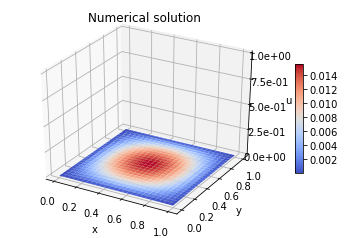

In [130]:
N_2500 = np.loadtxt('2d-numerical_tsteps2500_dt0,2_50x50.dat')
x = np.linspace(0,1,51)
surface_plot(x,x,N_2500,z_min = 0,z_max = 1 ,
                 title  = 'Numerical solution',
                 z_label = 'u',
                 filename = 'numerical_2500',
                 save = True)

print(np.max(N_2500))

### Error Analysis

/Users/phb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Max error: 2.329881977722846e-05
Max relativ error;  0.0014895995493282314


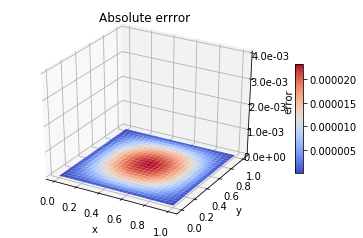

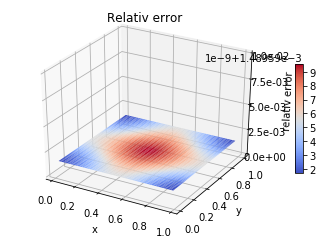

In [137]:
# Absolute error
E_2500 = np.abs(N_2500-A_2500)

surface_plot(x,x,E_2500,z_min = 0, z_max = 0.004 ,
                 title  = 'Absolute errror', 
                 z_label = 'error',
                 filename = 'abs_error_2500' ,
                 save = True)

# Relativ error
rE_2500 = E_2500/A_2500

surface_plot(x[1:-1],x[1:-1],rE_2500[1:-1,1:-1],z_min = 0, z_max = 0.01 ,
                 title  = 'Relativ error',
                 z_label = 'relativ error'
                 ,filename = 'rel_error_2500' ,
                 save = True)

print('Max error:' ,  np.max(E_2500))
print('Max relativ error; ', np.max(rE_2500[1:-1,1:-1]))